In [28]:
img_path = 'brain_tumor_dataset/Training/glioma/Tr-glTr_0000.jpg'

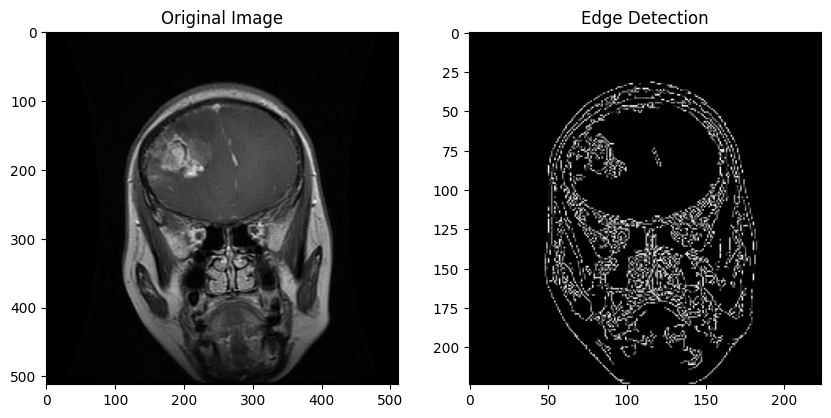

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(img_path)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)
edges_resized = cv2.resize(edges, (224, 224))

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(edges_resized, cmap='gray')
plt.title("Edge Detection")
plt.show()

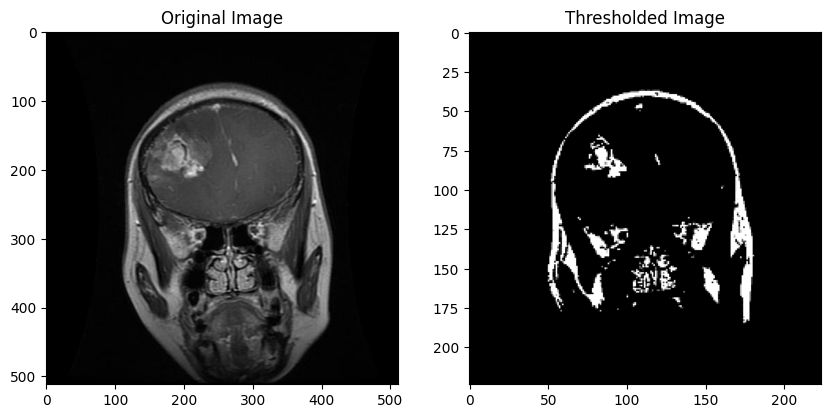

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply global thresholding
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
thresholded_resized = cv2.resize(thresholded_image, (224, 224))

# Display the original and thresholded images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholded_resized, cmap='gray')
plt.title("Thresholded Image")
plt.show()


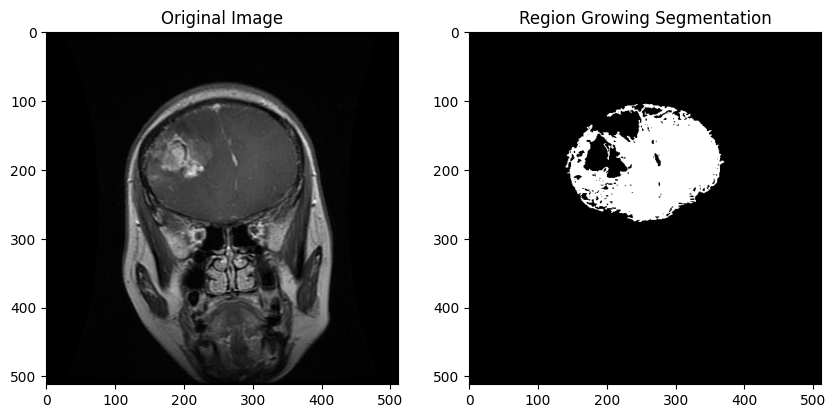

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(img_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the region-growing parameters
seed = (200, 200)  # Start point for region growing (change as needed)
threshold = 20      # Intensity threshold for similarity
visited = np.zeros_like(gray_image, dtype=np.uint8)  # Keeps track of visited pixels
region = np.zeros_like(gray_image, dtype=np.uint8)   # Stores the segmented region

# Define a function to perform region growing
def region_growing(seed, threshold):
    # List to hold the pixels to be visited (start with the seed point)
    pixels_to_visit = [seed]
    
    # Get the intensity of the seed point
    seed_intensity = gray_image[seed[1], seed[0]]
    
    while len(pixels_to_visit) > 0:
        current_pixel = pixels_to_visit.pop()
        
        # Get the coordinates of the current pixel
        x, y = current_pixel
        
        # Skip if the pixel has already been visited
        if visited[y, x] == 1:
            continue
        
        # Mark the pixel as visited
        visited[y, x] = 1
        
        # Cast the pixel intensities to a larger type (int16) to avoid overflow
        if abs(int(gray_image[y, x]) - int(seed_intensity)) < threshold:
            region[y, x] = 255  # Mark the region with a white pixel
            # Check the 4-neighbors (up, down, left, right)
            if x > 0: pixels_to_visit.append((x - 1, y))  # Left
            if x < gray_image.shape[1] - 1: pixels_to_visit.append((x + 1, y))  # Right
            if y > 0: pixels_to_visit.append((x, y - 1))  # Up
            if y < gray_image.shape[0] - 1: pixels_to_visit.append((x, y + 1))  # Down
    
    return region

# Perform region growing starting from the seed point
region_growing(seed, threshold)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(region, cmap='gray')
plt.title("Region Growing Segmentation")
plt.show()


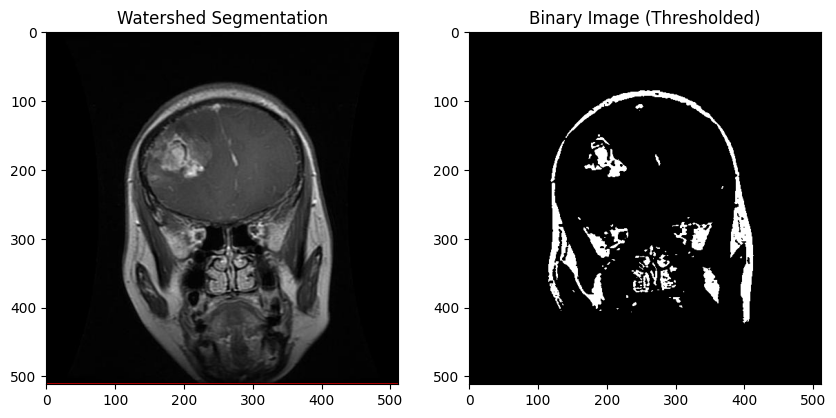

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure it is in color)
image = cv2.imread(img_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to segment the image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Remove noise using morphological operations (opening)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area: Dilate the image
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Sure foreground area: Use distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Find the unknown region: Subtract sure foreground from sure background
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers for watershed algorithm
# Mark sure regions as 1 and unknown regions as 0
markers = np.zeros_like(gray_image, dtype=np.int32)  # Use int32 for markers
markers[sure_fg == 255] = 1
markers[sure_bg == 255] = 2

# Apply the watershed algorithm
cv2.watershed(image, markers)

# Mark boundaries with a specific color (e.g., red)
image[markers == -1] = [0, 0, 255]  # Boundary in red

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image (Thresholded)")
plt.show()
